In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

In [2]:
#Read in data

df = pd.read_csv('NYPD_Arrests_Data__Historic_ (1).csv')

In [3]:
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,32311380,06/18/2007,511.0,"CONTROLLED SUBSTANCE, POSSESSION 7",235.0,DANGEROUS DRUGS,PL 2200300,M,Q,27,1.0,18-24,M,BLACK,NaN,NaN,NaN,NaN,NaN
1,192799737,01/26/2019,177.0,SEXUAL ABUSE,116.0,SEX CRIMES,PL 1306503,F,M,25,0.0,45-64,M,BLACK,1000555.0,230994.0,40.800694,-73.941109,POINT (-73.94110928599997 40.800694331000045)
2,193260691,02/06/2019,NaN,NaN,NaN,NaN,PL 2203400,F,M,14,0.0,25-44,M,UNKNOWN,986685.0,215375.0,40.757839,-73.991212,POINT (-73.99121211099998 40.75783900300007)
3,149117452,01/06/2016,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,K,67,0.0,25-44,M,BLACK,998032.0,175598.0,40.648650,-73.950336,POINT (-73.95033556299995 40.648650085000035)
4,190049060,11/15/2018,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,0.0,25-44,M,BLACK,1003606.0,185050.0,40.674583,-73.930222,POINT (-73.93022154099998 40.67458330800008)


In [4]:
#Find null rows

df.isna().sum()

ARREST_KEY               0
ARREST_DATE              0
PD_CD                  261
PD_DESC               9029
KY_CD                 9029
OFNS_DESC             9029
LAW_CODE               196
LAW_CAT_CD           17472
ARREST_BORO              8
ARREST_PRECINCT          0
JURISDICTION_CODE       10
AGE_GROUP               17
PERP_SEX                 0
PERP_RACE                0
X_COORD_CD               1
Y_COORD_CD               1
Latitude                 1
Longitude                1
Lon_Lat                  1
dtype: int64

In [5]:
#Change arrest date to datetime, and set it as the index

df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'])
df.set_index('ARREST_DATE', inplace=True)

df.head()

,ARREST_KEY,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
ARREST_DATE,,,,,,,,,,,,,,,,,,
2007-06-18,32311380,511.0,"CONTROLLED SUBSTANCE, POSSESSION 7",235.0,DANGEROUS DRUGS,PL 2200300,M,Q,27,1.0,18-24,M,BLACK,NaN,NaN,NaN,NaN,NaN
2019-01-26,192799737,177.0,SEXUAL ABUSE,116.0,SEX CRIMES,PL 1306503,F,M,25,0.0,45-64,M,BLACK,1000555.0,230994.0,40.800694,-73.941109,POINT (-73.94110928599997 40.800694331000045)
2019-02-06,193260691,NaN,NaN,NaN,NaN,PL 2203400,F,M,14,0.0,25-44,M,UNKNOWN,986685.0,215375.0,40.757839,-73.991212,POINT (-73.99121211099998 40.75783900300007)
2016-01-06,149117452,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,K,67,0.0,25-44,M,BLACK,998032.0,175598.0,40.648650,-73.950336,POINT (-73.95033556299995 40.648650085000035)
2018-11-15,190049060,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,0.0,25-44,M,BLACK,1003606.0,185050.0,40.674583,-73.930222,POINT (-73.93022154099998 40.67458330800008)


In [6]:
#Get variables of Year, Month, and Day of each crime from the index

df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day

df.head()

,ARREST_KEY,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,...,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat,Year,Month,Day
ARREST_DATE,,,,,,,,,,,,,,,,,,,,,
2007-06-18,32311380,511.0,"CONTROLLED SUBSTANCE, POSSESSION 7",235.0,DANGEROUS DRUGS,PL 2200300,M,Q,27,1.0,...,M,BLACK,NaN,NaN,NaN,NaN,NaN,2007,6,18
2019-01-26,192799737,177.0,SEXUAL ABUSE,116.0,SEX CRIMES,PL 1306503,F,M,25,0.0,...,M,BLACK,1000555.0,230994.0,40.800694,-73.941109,POINT (-73.94110928599997 40.800694331000045),2019,1,26
2019-02-06,193260691,NaN,NaN,NaN,NaN,PL 2203400,F,M,14,0.0,...,M,UNKNOWN,986685.0,215375.0,40.757839,-73.991212,POINT (-73.99121211099998 40.75783900300007),2019,2,6
2016-01-06,149117452,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,K,67,0.0,...,M,BLACK,998032.0,175598.0,40.648650,-73.950336,POINT (-73.95033556299995 40.648650085000035),2016,1,6
2018-11-15,190049060,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,0.0,...,M,BLACK,1003606.0,185050.0,40.674583,-73.930222,POINT (-73.93022154099998 40.67458330800008),2018,11,15


### Number of Arrests by Year

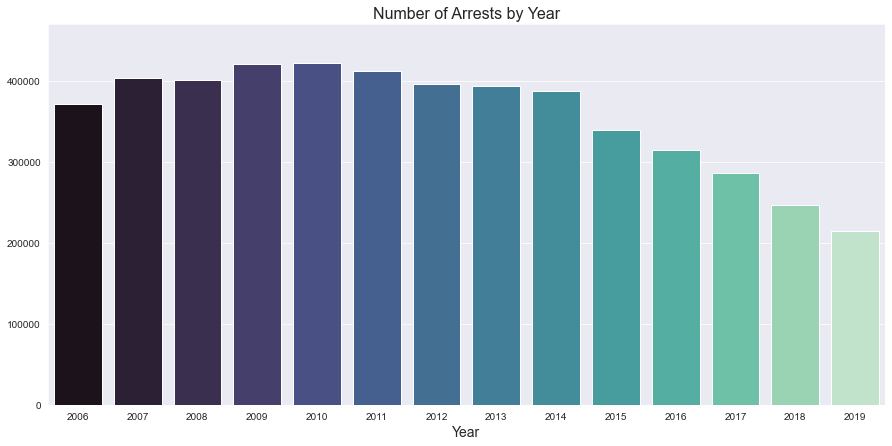

In [7]:
fig = plt.figure(figsize = (15,7))
yearly = df.groupby('Year').count()

sns.barplot(x = yearly.index, y = 'ARREST_KEY', data = yearly, palette = 'mako')
plt.ylim(0, 470000)

plt.xlabel('Year', fontsize=14)
plt.ylabel('')
plt.title('Number of Arrests by Year', fontsize=16)

fig.savefig('ArrestsByYear.png')

plt.show()

### Arrests by Borough

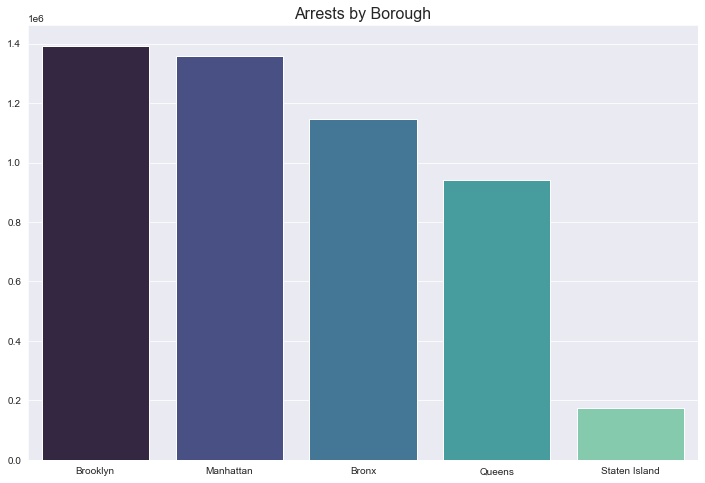

In [8]:
fig = plt.figure(figsize = (12,8))
boros = df['ARREST_BORO'].value_counts()

boros.index = ['Brooklyn', 'Manhattan', 'Bronx', 'Queens', 'Staten Island']

sns.barplot(x = boros.index, y = boros.values, palette = 'mako')

plt.title('Arrests by Borough', fontsize = 16)

fig.savefig('ArrestsByBorough.png')

plt.show()

### Crime by Race and Gender

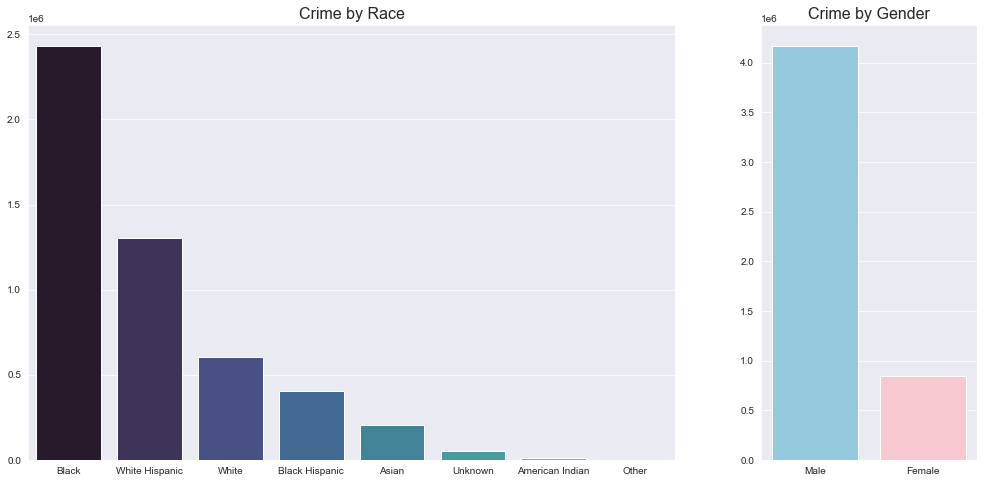

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (17,8), gridspec_kw={'width_ratios': [3, 1]})

gender_palette = {'Male' : 'skyblue', 'Female' : 'pink'}
by_race = df['PERP_RACE'].value_counts()
by_race.index = ['Black', 'White Hispanic', 'White', 'Black Hispanic', 'Asian', 'Unknown', 'American Indian', 'Other']

by_sex = df['PERP_SEX'].value_counts()
by_sex.index = ['Male', 'Female']

sns.barplot(x = by_race.index, y = by_race.values, palette = 'mako', ax = ax1)
sns.barplot(x = by_sex.index, y = by_sex.values, palette = gender_palette, ax = ax2)

ax1.set_title('Crime by Race', fontsize=16)
ax2.set_title('Crime by Gender', fontsize=16)

fig.savefig('CrimesGenderRace.png')

plt.show()

### Top 15 Most Frequent Crimes

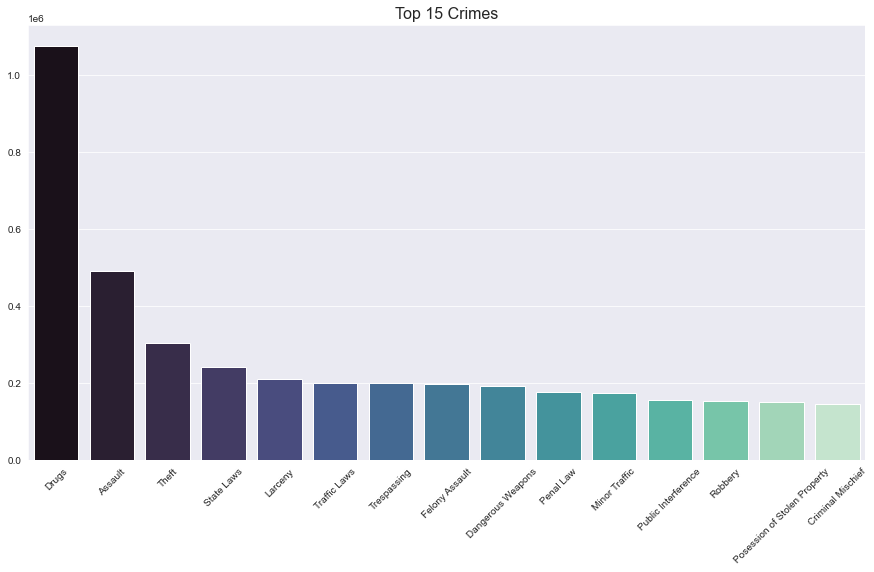

In [10]:
fig = plt.figure(figsize=(15,8))

crimes = df['OFNS_DESC'].value_counts()[:15]

crimes.index = ['Drugs', 'Assault', 'Theft', 'State Laws', 'Larceny', 'Traffic Laws', 'Trespassing', 'Felony Assault',
               'Dangerous Weapons', 'Penal Law', 'Minor Traffic', 'Public Interference', 'Robbery',
               'Posession of Stolen Property', 'Criminal Mischief']

sns.barplot(x = crimes.index, y = crimes.values, palette = 'mako')

plt.xticks(rotation=45)
plt.title('Top 15 Crimes', fontsize=16)

fig.savefig('Top15Crimes.png')
plt.show()

In [11]:
filtered = df[(df['OFNS_DESC'] == 'DANGEROUS DRUGS') | (df['OFNS_DESC'] == 'ASSAULT 3 & RELATED OFFENSES') | (df['OFNS_DESC'] == 'OTHER OFFENSES RELATED TO THEFT') |
              (df['OFNS_DESC'] == 'OTHER STATE LAWS') | (df['OFNS_DESC'] == 'PETIT LARCENY') | 
              (df['OFNS_DESC'] == 'VEHICLE AND TRAFFIC LAWS') | (df['OFNS_DESC'] == 'CRIMINAL TRESPASS') | 
              (df['OFNS_DESC'] == 'DANGEROUS WEAPONS') | (df['OFNS_DESC'] == 'MISCELLANEOUS PENAL LAW') | 
              (df['OFNS_DESC'] == 'OTHER TRAFFIC INFRACTION') | (df['OFNS_DESC'] == 'OFFENSES AGAINST PUBLIC ADMINISTRATION') |
              (df['OFNS_DESC'] == 'ROBBERY') | (df['OFNS_DESC'] == 'POSSESSION OF STOLEN PROPERTY 5') | 
              (df['OFNS_DESC'] == 'CRIMINAL MISCHIEF & RELATED OFFENSES')]
              


### Number of Assaults and Robberies by Month  

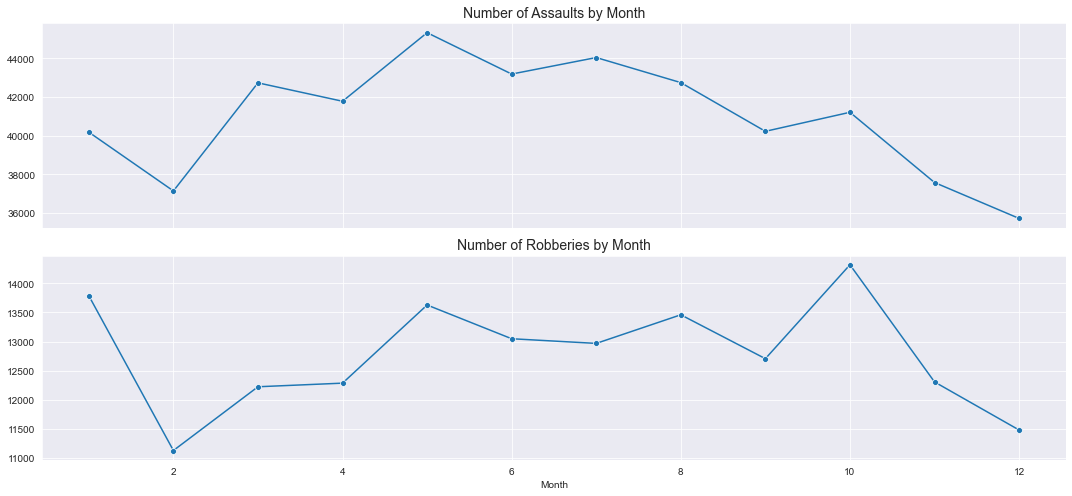

In [12]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (15,7), sharex=True)
assault = filtered[filtered['OFNS_DESC'] == 'ASSAULT 3 & RELATED OFFENSES']
assault_monthly = assault.groupby('Month').count()


robbery = filtered[filtered['OFNS_DESC'] == 'ROBBERY']
robbery_monthly = robbery.groupby('Month').count()


sns.lineplot(x = assault_monthly.index, y = 'ARREST_KEY', data = assault_monthly, marker = 'o', ax = ax1)
sns.lineplot(x = robbery_monthly.index, y = 'ARREST_KEY', data = robbery_monthly, marker = 'o', ax = ax2)


ax1.set_title('Number of Assaults by Month', fontsize=14)
ax1.set_ylabel('')

ax2.set_title('Number of Robberies by Month', fontsize=14)
ax2.set_ylabel('')

fig.savefig('AssaultsRobberiesMonth.png')

fig.tight_layout()

plt.show()

### Most Frequent Crimes by Borough

In [13]:
bronx = df[df['ARREST_BORO'] == 'B'].groupby(['OFNS_DESC']).count().sort_values('ARREST_KEY', ascending=False)[:5]
queens = df[df['ARREST_BORO'] == 'Q'].groupby(['OFNS_DESC']).count().sort_values('ARREST_KEY', ascending=False)[:5]
manhattan = df[df['ARREST_BORO'] == 'M'].groupby(['OFNS_DESC']).count().sort_values('ARREST_KEY', ascending=False)[:5]
brooklyn = df[df['ARREST_BORO'] == 'K'].groupby(['OFNS_DESC']).count().sort_values('ARREST_KEY', ascending=False)[:5]

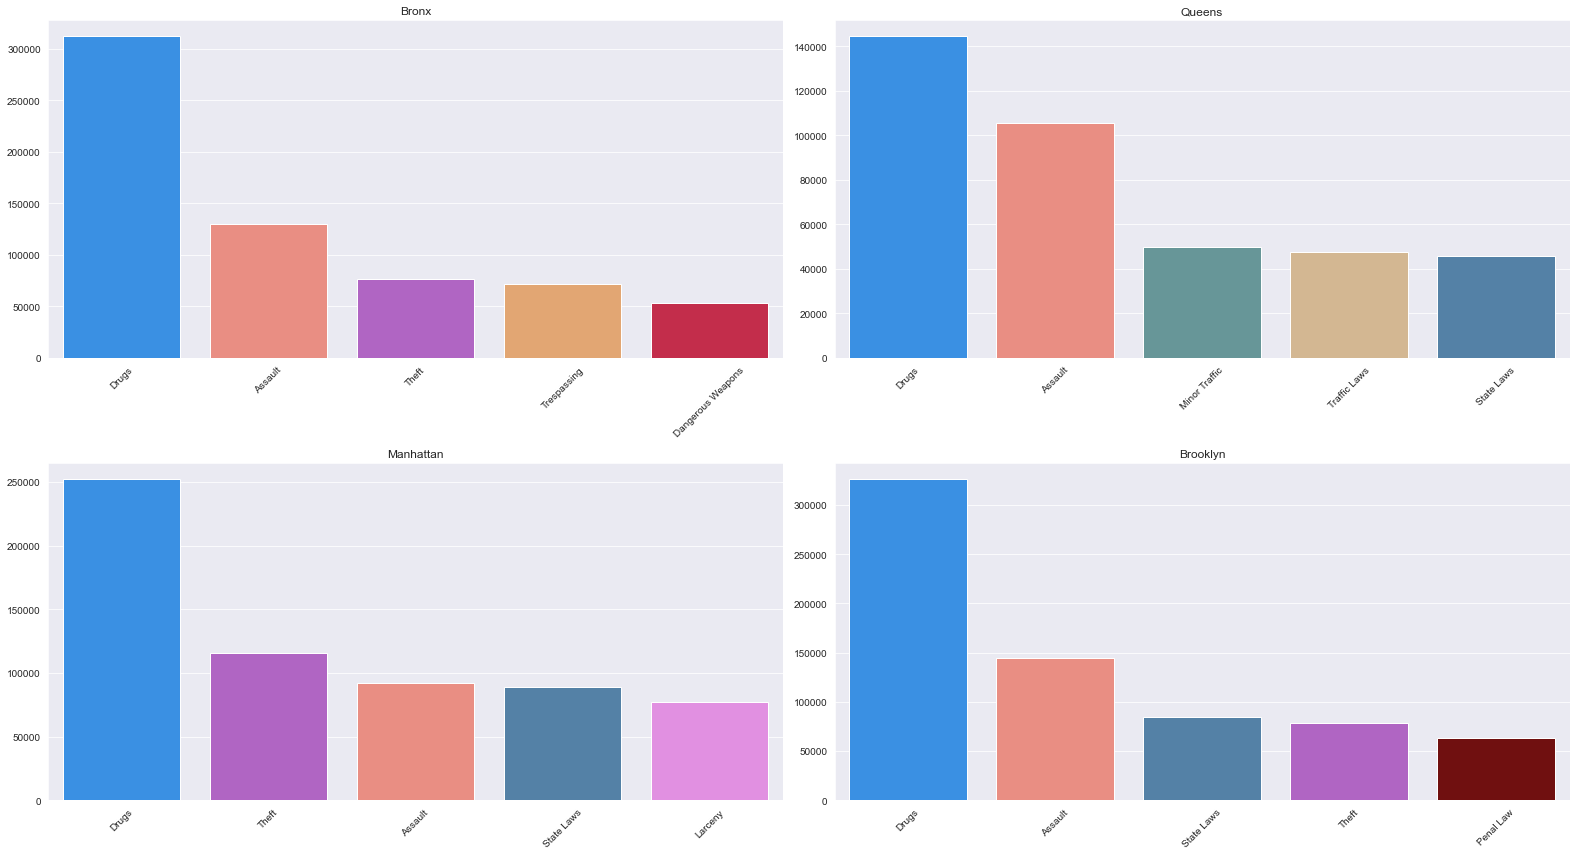

In [14]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (22,12))

bronx.index = ['Drugs', 'Assault', 'Theft', 'Trespassing', 'Dangerous Weapons']
palette = {'Drugs' : 'dodgerblue', 'Assault' : 'salmon', 'Theft' : 'mediumorchid', 'Trespassing' : 'sandybrown', 'Dangerous Weapons' : 'crimson',
          'Minor Traffic' : 'cadetblue', 'Traffic Laws' : 'burlywood', 'State Laws' : 'steelblue', 'Larceny' : 'violet', 'Penal Law' : 'maroon'}
queens.index = ['Drugs', 'Assault', 'Minor Traffic', 'Traffic Laws', 'State Laws']
manhattan.index = ['Drugs', 'Theft', 'Assault', 'State Laws', 'Larceny']
brooklyn.index = ['Drugs', 'Assault', 'State Laws', 'Theft', 'Penal Law']

sns.barplot(x = bronx.index, y = 'ARREST_KEY', data = bronx, ax = ax1, palette = palette)
sns.barplot(x = queens.index, y = 'ARREST_KEY', data = queens, ax = ax2, palette = palette)
sns.barplot(x = manhattan.index, y = 'ARREST_KEY', data = manhattan, ax = ax3, palette = palette)
sns.barplot(x = brooklyn.index, y = 'ARREST_KEY', data = brooklyn, ax = ax4, palette = palette)

plt.setp(ax1.get_xticklabels(), rotation=45)
plt.setp(ax2.get_xticklabels(), rotation=45)
plt.setp(ax3.get_xticklabels(), rotation=45)
plt.setp(ax4.get_xticklabels(), rotation=45)


ax1.set_title('Bronx')
ax2.set_title('Queens')
ax3.set_title('Manhattan')
ax4.set_title('Brooklyn')

ax1.set_ylabel('')
ax2.set_ylabel('')
ax3.set_ylabel('')
ax4.set_ylabel('')

plt.tight_layout()
fig.savefig('Top5CrimesBorough.png')
plt.show()

### Frequency of Crime by Age Group

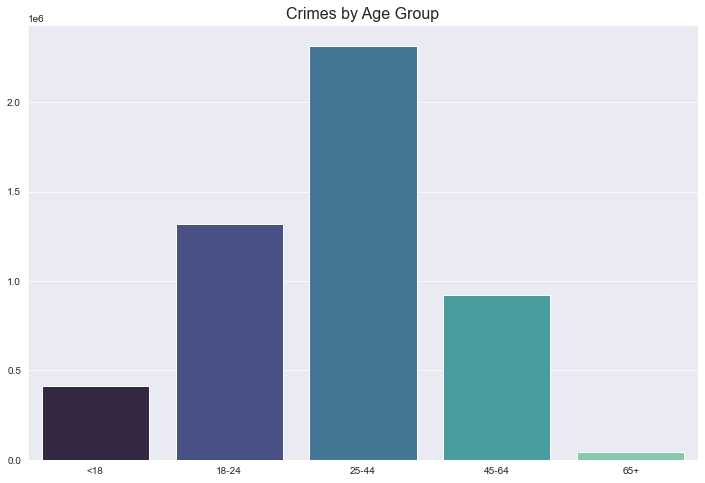

In [15]:
age_group = df['AGE_GROUP'].value_counts()[:5].reindex(['<18', '18-24', '25-44', '45-64', '65+'])

fig = plt.figure(figsize = (12,8))
sns.barplot(x = age_group.index, y = age_group.values, palette='mako')

plt.title('Crimes by Age Group', fontsize=16)
fig.savefig('CrimesAgeGroup.png')